# Effect of low birth rate to population and working population (15-64 years old) in Japan

**This study is conducted to discuss the relation of fertility rate and working age population. The two data sets about birth rate and number of people at the working age in Japan have positive correlation. Low fertility rate is a disadvantage to Japan since the number of people in the labor force will decrease; hence, there are higher chances that the elderly have to work and there may be a decline in working efficiency. This will affect Japan's economy.**

## Import package

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [427]:
from scipy.optimize import curve_fit
from scipy import stats

## Read CSV

In [356]:
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv') # Import population data
df_rate = pd.read_csv('japan-population-2023-12-03.csv') # Import birthrate data
df_work = pd.read_csv('LFWA64TTJPM647S.csv') # Import no. of people in working age

In [357]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [358]:
df_rate

,date,Births per 1000 People,Annual % Change
0,12/31/1950,26.774,NaN
1,12/31/1951,25.708,-3.98
2,12/31/1952,24.641,-4.15
3,12/31/1953,23.574,-4.33
4,12/31/1954,22.507,-4.53
...,...,...,...
146,12/31/2096,7.769,0.10
147,12/31/2097,7.778,0.12
148,12/31/2098,7.786,0.10
149,12/31/2099,7.794,0.10


In [359]:
df_work

,DATE,LFWA64TTJPM647S
0,1/1/1970,70983116.11
1,2/1/1970,71105826.79
2,3/1/1970,71251812.37
3,4/1/1970,71342059.73
4,5/1/1970,71416224.15
...,...,...
640,5/1/2023,74032582.84
641,6/1/2023,74111359.39
642,7/1/2023,74117630.30
643,8/1/2023,74019082.50


## Data processing: population

In [360]:
# Retrieve data from Japan only
for index, row in df_popu.iterrows():
    if (row['Country Name'] != 'Japan'):
        df_popu.drop(index, inplace = True)
df_popu.drop('Country Name', axis = 1, inplace = True)
df_popu.drop('Country Code', axis = 1, inplace = True)
df_popu.drop('Indicator Name', axis = 1, inplace = True)
df_popu.drop('Indicator Code', axis = 1, inplace = True)
df_popu

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
119,93216000.0,94055000.0,94933000.0,95900000.0,96903000.0,97952000.0,98851000.0,99879000.0,101011000.0,102219000.0,...,127445000.0,127276000.0,127141000.0,127076000.0,126972000.0,126811000.0,126633000.0,126261000.0,125681593.0,125124989.0


In [361]:
# Swap row and column
dict_popu = {
    'year': range(1960, 2023),
    'population': []
}
for i in range(1960, 2023):
    s = str(i)
    dict_popu['population'].append(df_popu.loc[119, s])
df_popu = pd.DataFrame(dict_popu)
df_popu['population']=df_popu['population'].astype(int)
df_popu

,year,population
0,1960,93216000
1,1961,94055000
2,1962,94933000
3,1963,95900000
4,1964,96903000
...,...,...
58,2018,126811000
59,2019,126633000
60,2020,126261000
61,2021,125681593


In [362]:
print(df_popu.dtypes)

year          int64
population    int32
dtype: object


## Data processing: Birthrate

In [363]:
# The full date is not important, we only have to access the year
for index, row in df_rate.iterrows():
    ls = list(row['date'].split('/'))
    df_rate.loc[index, 'date'] = ls[2]

In [364]:
df_rate=df_rate.rename(columns={'date':'year',
                                ' Births per 1000 People':'Bp1000',
                                ' Annual % Change':'%change'})

In [365]:
print(df_rate.dtypes)

year        object
Bp1000     float64
%change    float64
dtype: object


In [366]:
df_rate['year']=df_rate['year'].astype(int)

In [367]:
for index, row in df_rate.iterrows():
    if (row['%change'] == 'NaN'):
        row['%change'] = np.nan

In [368]:
df_rate

,year,Bp1000,%change
0,1950,26.774,NaN
1,1951,25.708,-3.98
2,1952,24.641,-4.15
3,1953,23.574,-4.33
4,1954,22.507,-4.53
...,...,...,...
146,2096,7.769,0.10
147,2097,7.778,0.12
148,2098,7.786,0.10
149,2099,7.794,0.10


## Data Processing: No. of people in working age (15 - 64)

In [369]:
# Filter out data for December only
for index, row in df_work.iterrows():
    date = list(row['DATE'].split('/'))
    if (int(date[0]) != 12):
        df_work.drop(index, inplace = True)
    else:
        df_work.loc[index, 'DATE'] = date[2]

In [370]:
df_work.reset_index(drop = True, inplace = True)
df_work=df_work.rename(columns={'DATE':'year',
                                'LFWA64TTJPM647S':'no. working'})
df_work

,year,no. working
0,1970,71755260.18
1,1971,72514506.36
2,1972,73628016.71
3,1973,74255179.56
4,1974,74900473.58
5,1975,75747381.99
6,1976,76324036.40
7,1977,76891682.32
8,1978,77386912.50
9,1979,78018210.64


In [395]:
print(df_work.dtypes)

year            object
no. working    float64
dtype: object


In [396]:
df_work['year']=df_work['year'].astype(int)

## Data Summarization

In [371]:
df_popu['population'].describe()

count    6.300000e+01
mean     1.184170e+08
std      1.107610e+07
min      9.321600e+07
25%      1.121740e+08
50%      1.239640e+08
75%      1.270240e+08
max      1.280700e+08
Name: population, dtype: float64

In [372]:
df_rate.describe()

,year,Bp1000,%change
count,151.000000,151.000000,150.000000
mean,2025.000000,10.340397,-0.805800
std,43.734045,4.726364,1.567648
min,1950.000000,6.921000,-5.530000
25%,1987.500000,7.309000,-1.255000
50%,2025.000000,7.803000,-0.260000
75%,2062.500000,11.247500,0.360000
max,2100.000000,26.774000,1.110000


In [373]:
df_work['no. working'].describe()

count    5.300000e+01
mean     8.076826e+07
std      4.739505e+06
min      7.175526e+07
25%      7.637147e+07
50%      8.137556e+07
75%      8.538962e+07
max      8.695003e+07
Name: no. working, dtype: float64

## Data Visualization: Population

In [374]:
# Find the year with highest population
y = 0
maxi = 0
for index, row in df_popu.iterrows():
    if maxi < row['population']:
        maxi = row['population']
        y = row['year']
y

2010

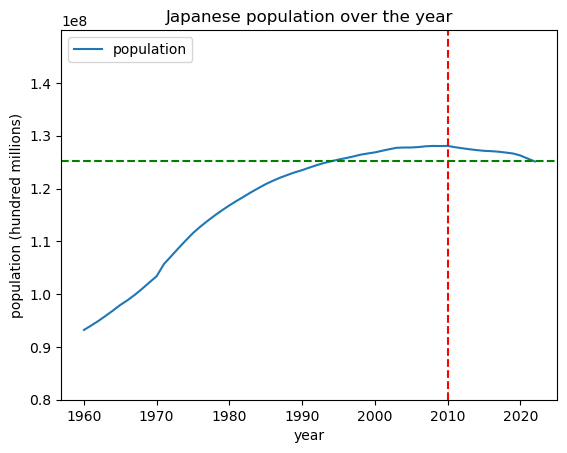

In [375]:
plt.figure()
plt.plot(df_popu['year'],df_popu['population'],label='population')
plt.axvline(x = y, color = 'red', linestyle = '--')
plt.axhline(y = df_popu.loc[62, 'population'], color = 'green', linestyle = '--')

plt.ylim([80000000, 150000000])
plt.yticks(np.arange(80000000, 150000000,10000000))

plt.title("Japanese population over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('population (hundreds of millions)')

plt.show()

In [376]:
# Plot increasing rate of Japanese population

inc_rate = [np.nan]
for index, row in df_popu.iterrows():
    if (index == 0):
        continue
    inc = (row['population'] - df_popu.loc[index - 1, 'population']) / df_popu.loc[index - 1, 'population'] * 100
    inc_rate.append(inc)
df_popu['inc_rate'] = inc_rate
df_popu

,year,population,inc_rate
0,1960,93216000,NaN
1,1961,94055000,0.900060
2,1962,94933000,0.933496
3,1963,95900000,1.018613
4,1964,96903000,1.045881
...,...,...,...
58,2018,126811000,-0.126800
59,2019,126633000,-0.140366
60,2020,126261000,-0.293762
61,2021,125681593,-0.458896


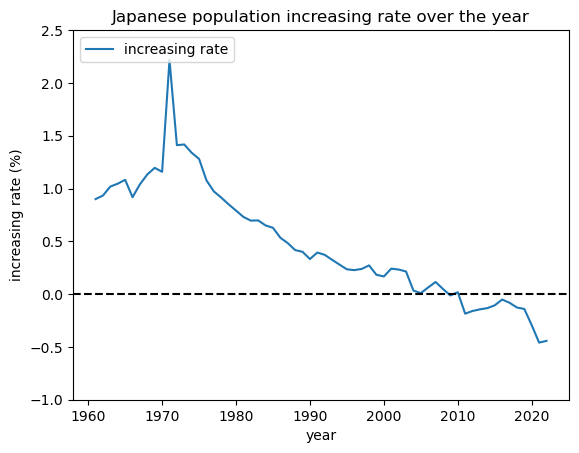

In [377]:
plt.figure()
plt.plot(df_popu['year'],df_popu['inc_rate'],label='increasing rate')
plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.ylim([-1, 2])
plt.yticks(np.arange(-1, 3, 0.5))

plt.title("Japanese population increasing rate over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('increasing rate (%)')

plt.show()

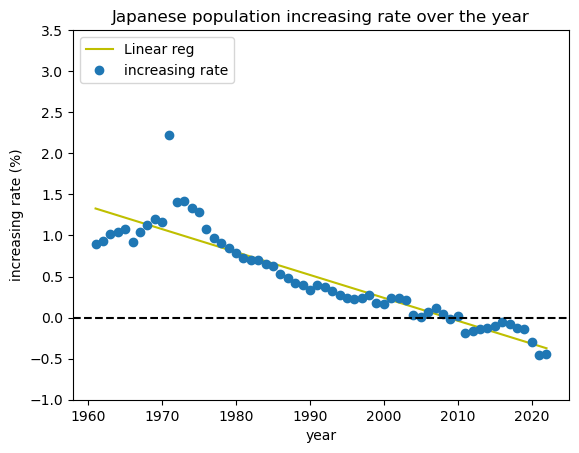

In [431]:
y = df_popu.loc[1:, 'inc_rate']
x = df_popu.loc[1:, 'year']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.figure()

plt.plot(x,mymodel,'y-',label='Linear reg')
plt.plot(df_popu['year'],df_popu['inc_rate'],'o',label='increasing rate')
plt.axhline(y = 0, color = 'black', linestyle = '--') 

plt.ylim([-1, 2])
plt.yticks(np.arange(-1, 4, 0.5))

plt.title("Japanese population increasing rate over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('increasing rate (%)')

plt.show()

## Data Visualization: Birth rate

In [379]:
# Create birth rate percentage (Bp1000 is per 1000)
birth_rate = []
for index, row in df_rate.iterrows():
    birth_rate.append(row['Bp1000'] / 10)
df_rate['rate'] = birth_rate

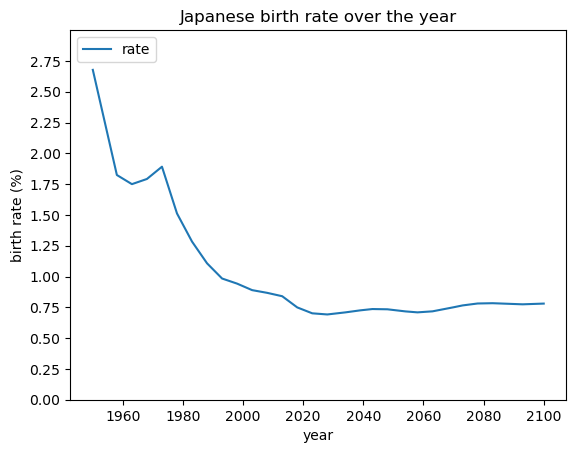

In [380]:
plt.figure()
plt.plot(df_rate['year'],df_rate['rate'],label='rate')

plt.ylim([0, 3])
plt.yticks(np.arange(0, 3, 0.25))

plt.title("Japanese birth rate over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('birth rate (%)')

plt.show()

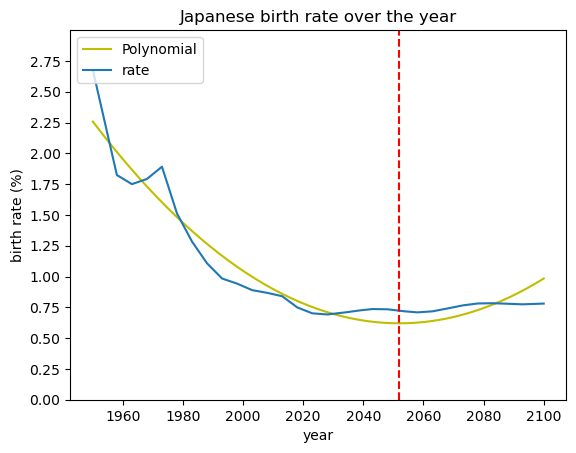

In [381]:
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c 

y = df_rate['rate']
x = df_rate['year']

(popt,pcov) = curve_fit(polynomial_function, x, y)
(a,b,c) = popt

plt.figure()

x_line = df_rate['year']
y_line = polynomial_function(x_line,a,b,c)
plt.plot(x_line,y_line,'y-',label='Polynomial')
plt.plot(df_rate['year'],df_rate['rate'],label='rate')
plt.axvline(x = -b/2/a, color = 'red', linestyle = '--')

plt.ylim([0, 3])
plt.yticks(np.arange(0, 3, 0.25))

plt.title("Japanese birth rate over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('birth rate (%)')

plt.show()

In [382]:
-b/2/a

2051.960150900647

## Data Visualization: Working population

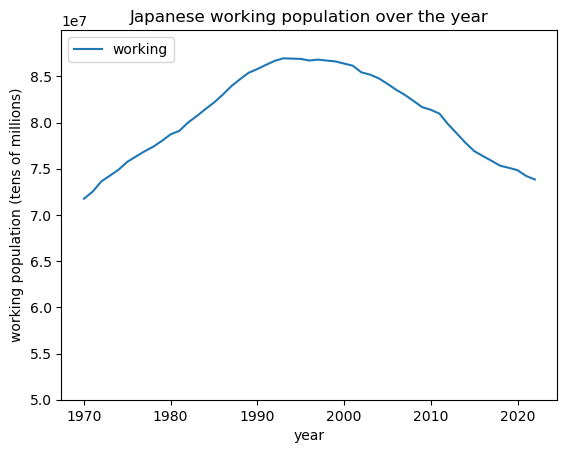

In [420]:
plt.figure()
plt.plot(df_work['year'],df_work['no. working'],label='working')

plt.ylim([50000000, 90000000])
plt.yticks(np.arange(50000000, 90000000, 5000000))

plt.title("Japanese working population over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('working population (tens of millions)')

plt.show()

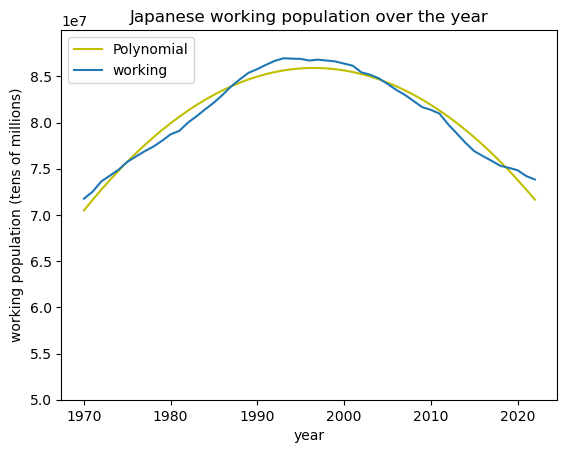

In [419]:
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c 

y = df_work['no. working']
x = df_work['year']

(popt,pcov) = curve_fit(polynomial_function, x, y)
(a,b,c) = popt

plt.figure()

x_line = df_work['year']
y_line = polynomial_function(x_line,a,b,c)
plt.plot(x_line,y_line,'y-',label='Polynomial')
plt.plot(df_work['year'],df_work['no. working'],label='working')

plt.ylim([50000000, 90000000])
plt.yticks(np.arange(50000000, 90000000, 5000000))

plt.title("Japanese working population over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('working population (tens of millions)')

plt.show()

## Data Visualization: population and working population

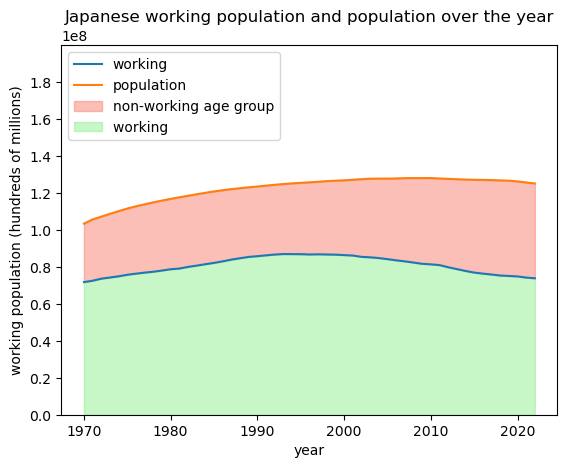

In [425]:
plt.figure()
plt.plot(df_work['year'],df_work['no. working'],label='working')
plt.plot(df_popu.loc[10:, 'year'],df_popu.loc[10:, 'population'],label='population')

plt.ylim([0, 200000000])
plt.yticks(np.arange(0, 200000000,20000000))

plt.fill_between(df_work['year'], df_popu.loc[10:, 'population'], df_work['no. working'], color='salmon', alpha=0.5, label = 'non-working age group')
plt.fill_between(df_work['year'], 0, df_work['no. working'], color='lightgreen', alpha=0.5, label = 'working ')

plt.title("Japanese working population and population over the year")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('working population (hundreds of millions)')

plt.show()